<a href="https://colab.research.google.com/github/nayanab565/CA-Water-Project/blob/master/CAWaterProjectGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data
Converting Json file to a pandas dataframe

In [0]:
import pandas as pd
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/aaronhans/community-water-center/master/data/locations.json") as url:
    data = json.loads(url.read().decode())

In [0]:
data_ref = data['features']
ini_string = json.dumps(data_ref) 
final_dict = json.loads(ini_string) 
df = pd.io.json.json_normalize(final_dict)
df.head(10)

,geometry.coordinates,geometry.type,properties.CITY_1,properties.CLASSIFICA,properties.COUNTY,properties.DEFAULT_ME,properties.DETAILED_V,properties.GIS_STATUS,properties.ObjectID,properties.POPULATION,properties.REGULATING,properties.Service_Co,properties.WATER_SYST,properties.WATER_SY_1,properties.ZIPCODE,type
0,"[-120.34304026577055, 38.26007179292807]",Point,ARNOLD,COMMUNITY,ALPINE,None,https://www.waterboards.ca.gov/water_issues/pr...,OUT-OF-COMPLIANCE,92999,625,DISTRICT 10 - STOCKTON,487,CA0210001,LAKE ALPINE WATER COMPANY,95223,Feature
1,"[-120.93851289799002, 38.35085515121932]",Point,IONE,COMMUNITY,AMADOR,None,https://www.waterboards.ca.gov/water_issues/pr...,RETURNED TO COMPLIANCE,93000,2000,DISTRICT 10 - STOCKTON,190,CA0300037,JACKSON VALLEY IRRIGATION DISTRICT,95640,Feature
2,"[-120.65602175312483, 38.40973310030034]",Point,PINE GROVE,COMMUNITY,AMADOR,None,https://www.waterboards.ca.gov/water_issues/pr...,OUT-OF-COMPLIANCE,93001,846,DISTRICT 10 - STOCKTON,388,CA0310005,PINE GROVE COMM SERV DIST,95665,Feature
3,"[-120.65602175312483, 38.40973310030034]",Point,PINE GROVE,COMMUNITY,AMADOR,None,https://www.waterboards.ca.gov/water_issues/pr...,RETURNED TO COMPLIANCE,93002,838,DISTRICT 10 - STOCKTON,337,CA0310011,FIRST MACE MEADOW # 1,95665,Feature
4,"[-120.5599795028072, 38.0693804411396]",Point,ANGELS CAMP,COMMUNITY,CALAVERAS,None,https://www.waterboards.ca.gov/water_issues/pr...,RETURNED TO COMPLIANCE,93003,3836,DISTRICT 10 - STOCKTON,1835,CA0510003,"ANGELS, CITY OF",95222,Feature
5,"[-120.83309806707067, 38.16323776479542]",Point,"VALLEY SPRINGS,",COMMUNITY,CALAVERAS,None,https://www.waterboards.ca.gov/water_issues/pr...,OUT-OF-COMPLIANCE,93004,180,DISTRICT 10 - STOCKTON,448,CA0510012,CAMANCHE SOUTH SHORE-EBMUD,95252,Feature
6,"[-121.89368061069057, 39.07454530284298]",Point,GRIMES,COMMUNITY,COLUSA,None,https://www.waterboards.ca.gov/water_issues/pr...,OUT-OF-COMPLIANCE,93005,381,DISTRICT 21 - VALLEY,123,CA0600008,COLUSA CO. WWD #1 - GRIMES,95950,Feature
7,"[-121.66455099090666, 37.968988885936355]",Point,KNIGHTSEN,NON-TRANSIENT NON-COMMUNITY,CONTRA COSTA,None,https://www.waterboards.ca.gov/water_issues/pr...,RETURNED TO COMPLIANCE,93006,350,LPA37 - CONTRA COSTA COUNTY,3,CA0706028,KNIGHTSEN ELEMENTARY SCHOOL,94548,Feature
8,"[-121.76806582571129, 37.67931008721329]",Point,LIVERMORE,COMMUNITY,CONTRA COSTA,None,https://www.waterboards.ca.gov/water_issues/pr...,RETURNED TO COMPLIANCE,93007,49,LPA37 - CONTRA COSTA COUNTY,18,CA0707615,DOUBLETREE RANCH WATER SYSTEM,94550,Feature
9,"[-120.84393639907705, 38.68205303500461]",Point,EL DORADO,COMMUNITY,EL DORADO,None,https://www.waterboards.ca.gov/water_issues/pr...,OUT-OF-COMPLIANCE,93008,100,LPA39 - EL DORADO COUNTY,50,CA0900102,GOLD BEACH PARK,95623,Feature


#Sizes and Labels

In [0]:
import numpy as np
num_each_county = pd.value_counts(df['properties.COUNTY'])
num_each_district = pd.value_counts(df['properties.REGULATING'])
labels_county = num_each_county.as_matrix(columns = None)
labels_district = num_each_district.as_matrix(columns = None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


#Plots

Text(0, 0.5, 'Number of Contaminated Water Systems')

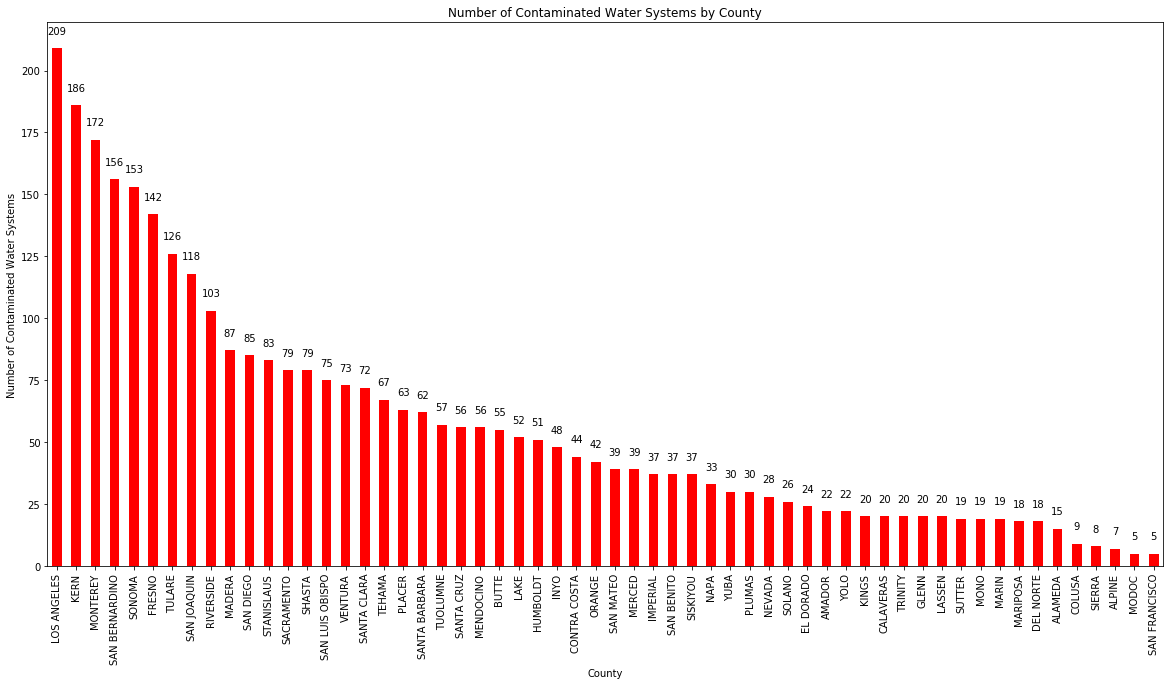

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
num_each_county.plot(ax=ax, kind='bar', figsize = (20, 10), color = "red")
rects1 = ax.patches
for rect1, label1 in zip(rects1, labels_county):
    height = rect1.get_height()
    ax.text(rect1.get_x() + rect1.get_width() / 2, height + 5, label1,
            ha='center', va='bottom')
plt.title('Number of Contaminated Water Systems by County')
plt.xlabel('County')
plt.ylabel('Number of Contaminated Water Systems')

Text(0, 0.5, 'Number of Contaminated Water Systems')

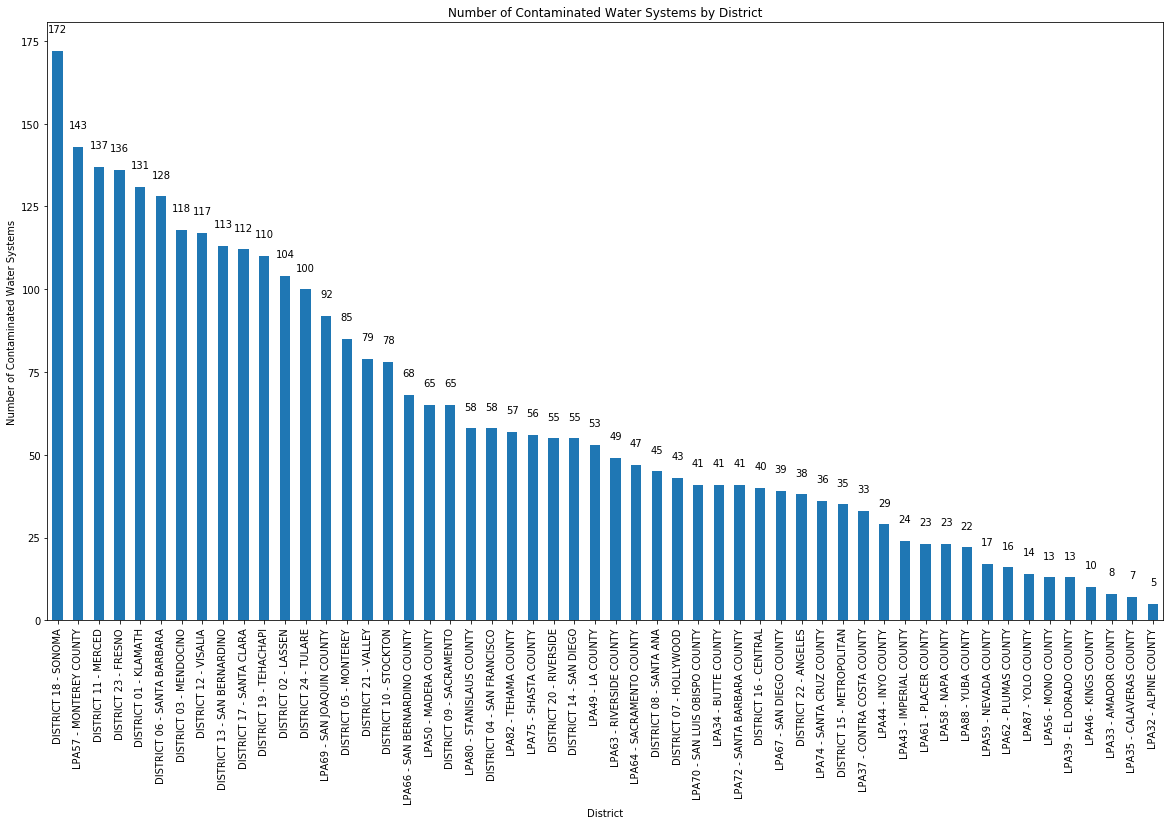

In [0]:
fig2, ax2 = plt.subplots()
num_each_district.plot(ax=ax2, kind='bar', figsize = (20, 11))
rects2 = ax2.patches
for rect2, label2 in zip(rects2, labels_district):
    height = rect2.get_height()
    ax2.text(rect2.get_x() + rect2.get_width() / 2, height + 5, label2,
            ha='center', va='bottom')
plt.title('Number of Contaminated Water Systems by District')
plt.xlabel('District')
plt.ylabel('Number of Contaminated Water Systems')

In [0]:
from google.colab import files
comp_file = files.upload()

Saving hr2w_web_data_summary.xls to hr2w_web_data_summary (5).xls


In [0]:
an_file = files.upload()

Saving hr2w_graphic_data_ooc_pws_analyte.xlsx to hr2w_graphic_data_ooc_pws_analyte (1).xlsx


In [0]:
pop_file = files.upload()

Saving hr2w_graphic_data_number_ooc_pop_analyte.xlsx to hr2w_graphic_data_number_ooc_pop_analyte (1).xlsx


In [0]:
import io
compliance = pd.read_excel('hr2w_web_data_summary.xls', sheetname='tblInventory_Map_Summary')
analyte = pd.read_excel('hr2w_graphic_data_ooc_pws_analyte.xlsx', sheetname='qryBI_OOC_County_Analyte_Final')
population = pd.read_excel('hr2w_graphic_data_number_ooc_pop_analyte.xlsx', sheetname='qryBI_OOC_County_Analyte_Pop_Fi')

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


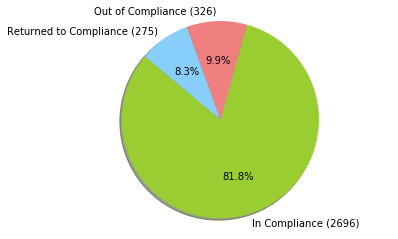

In [0]:
sizes = pd.value_counts(compliance['COMPLIANCE_STATUS'])
labels = ['In Compliance (' + str(sizes[0]) + ')', 'Out of Compliance (' + str(sizes[1]) + ')', 'Returned to Compliance (' + str(sizes[2]) + ')']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

([<matplotlib.patches.Wedge at 0x7fdc456e8748>,
 [Text(-1.0999687383516055, -0.008293048244024428, 'ARSENIC'),
  Text(-0.24708255807879836, -1.071890950373795, '1,2,3-TRICHLOROPROPANE'),
  Text(0.8329762502846316, -0.7184361951222634, 'NITRATE'),
  Text(1.0998871470657505, 0.01575638662778952, 'COMBINED URANIUM'),
  Text(0.9336431159296265, 0.5816446785428525, 'TTHM'),
  Text(0.5319482266177471, 0.9628245344808338, 'TOTAL HALOACETIC ACIDS (HAA5)'),
  Text(0.17383878526833088, 1.0861768165158154, 'NITRATE-NITRITE'),
  Text(-0.049327613850490434, 1.0988934372867176, 'FLUORIDE'),
  Text(-0.25596323956083983, 1.069805038310028, 'SWTR'),
  Text(-0.419131390342649, 1.0170196053318925, 'TURBIDITY'),
  Text(-0.5268595342086244, 0.9656184708327982, '1,2-DIBROMO-3-CHLOROPROPANE'),
  Text(-0.6160743840460811, 0.9112915852361647, 'GROSS ALPHA PARTICLE ACTIVITY'),
  Text(-0.6764431247060027, 0.8674241748060632, 'IRON'),
  Text(-0.7111872483530188, 0.8391738185739958, 'MANGANESE'),
  Text(-0.7392427

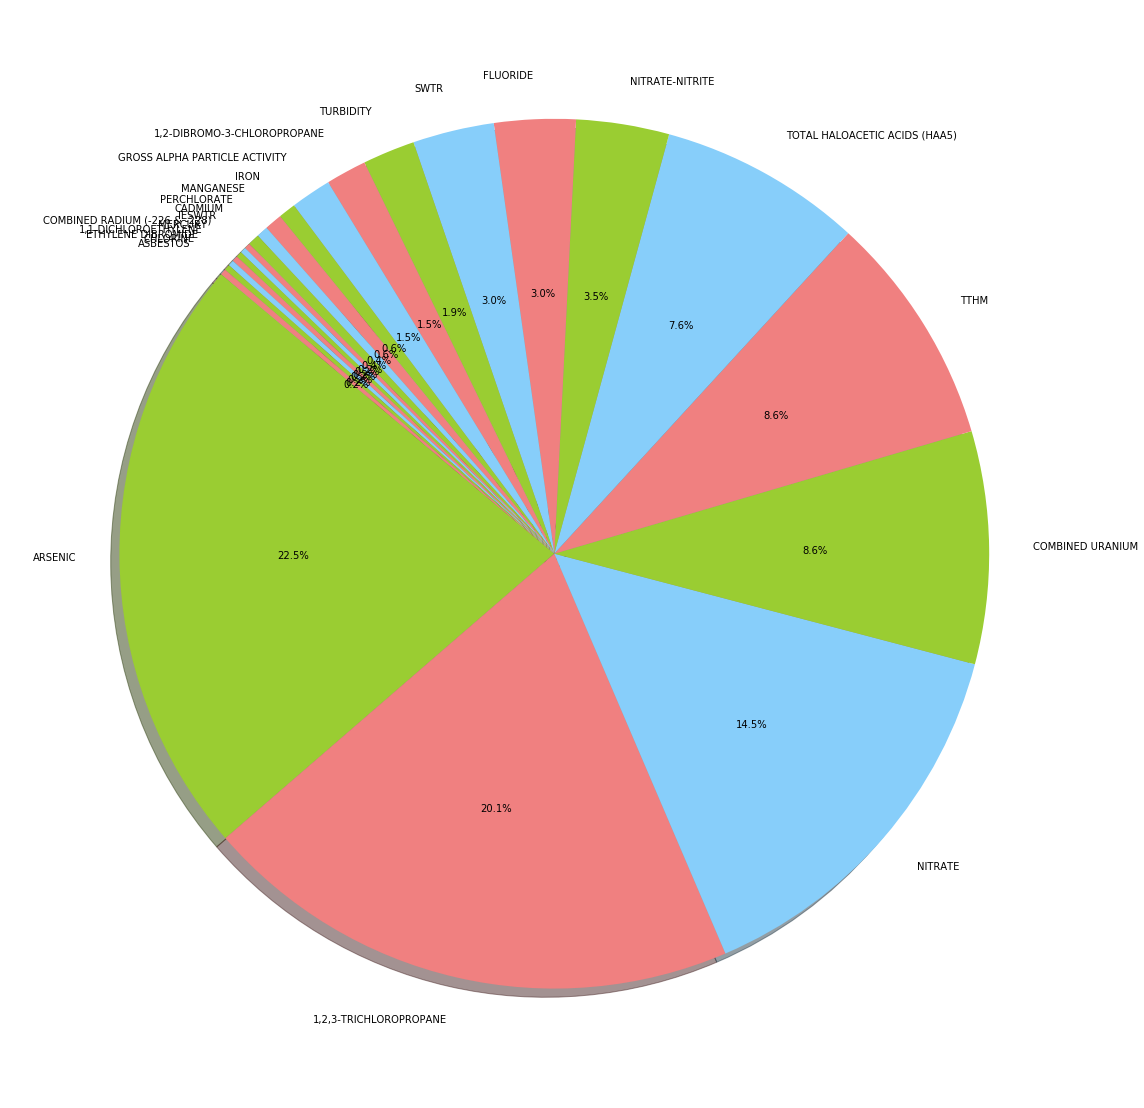

In [137]:
size_ana = pd.value_counts(analyte['ANALYTE_NAME'])
labels_ana = ['ARSENIC', '1,2,3-TRICHLOROPROPANE', 'NITRATE', 'COMBINED URANIUM', 
          'TTHM', 'TOTAL HALOACETIC ACIDS (HAA5)', 'NITRATE-NITRITE', 'FLUORIDE', 
          'SWTR', 'TURBIDITY', '1,2-DIBROMO-3-CHLOROPROPANE', 'GROSS ALPHA PARTICLE ACTIVITY', 
          'IRON', 'MANGANESE', 'PERCHLORATE', 'CADMIUM', 'IESWTR', 'COMBINED RADIUM (-226 & -228)', 
          'MERCURY', '1,1-DICHLOROETHYLENE', 'ETHYLENE DIBROMIDE', 'CHLORINE', 'ASBESTOS']
plt.figure(figsize=(40,20))
plt.pie(size_ana, labels=labels_ana, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


([<matplotlib.patches.Wedge at 0x7fdc45636518>,
 [Text(-0.8430248124997457, 0.7066181185829931, '1,1-DICHLOROETHYLENE'),
  Text(-0.8857181252852929, -0.6523062183829818, '1,2,3-TRICHLOROPROPANE'),
  Text(0.4591761467972293, -0.9995785442937686, '1,2-DIBROMO-3-CHLOROPROPANE'),
  Text(0.9917546181429894, -0.47583902466280903, 'ARSENIC'),
  Text(1.0756576855178959, 0.23013157885497484, 'ASBESTOS'),
  Text(1.0754762113373848, 0.23097817829263678, 'CADMIUM'),
  Text(1.0737946974257508, 0.2386733076410942, 'CHLORINE'),
  Text(1.0721717372610065, 0.24586127352373996, 'COMBINED RADIUM (-226 & -228)'),
  Text(1.028805233912445, 0.3893068078962399, 'COMBINED URANIUM'),
  Text(0.9636678314754551, 0.5304189953040842, 'ETHYLENE DIBROMIDE'),
  Text(0.951973371333163, 0.5511321985445706, 'FLUORIDE'),
  Text(0.9396695731133969, 0.5718575813652266, 'GROSS ALPHA PARTICLE ACTIVITY'),
  Text(0.9351294519491775, 0.5792520246811669, 'IESWTR'),
  Text(0.931836655630811, 0.5845343849790068, 'IRON'),
  Text(0.

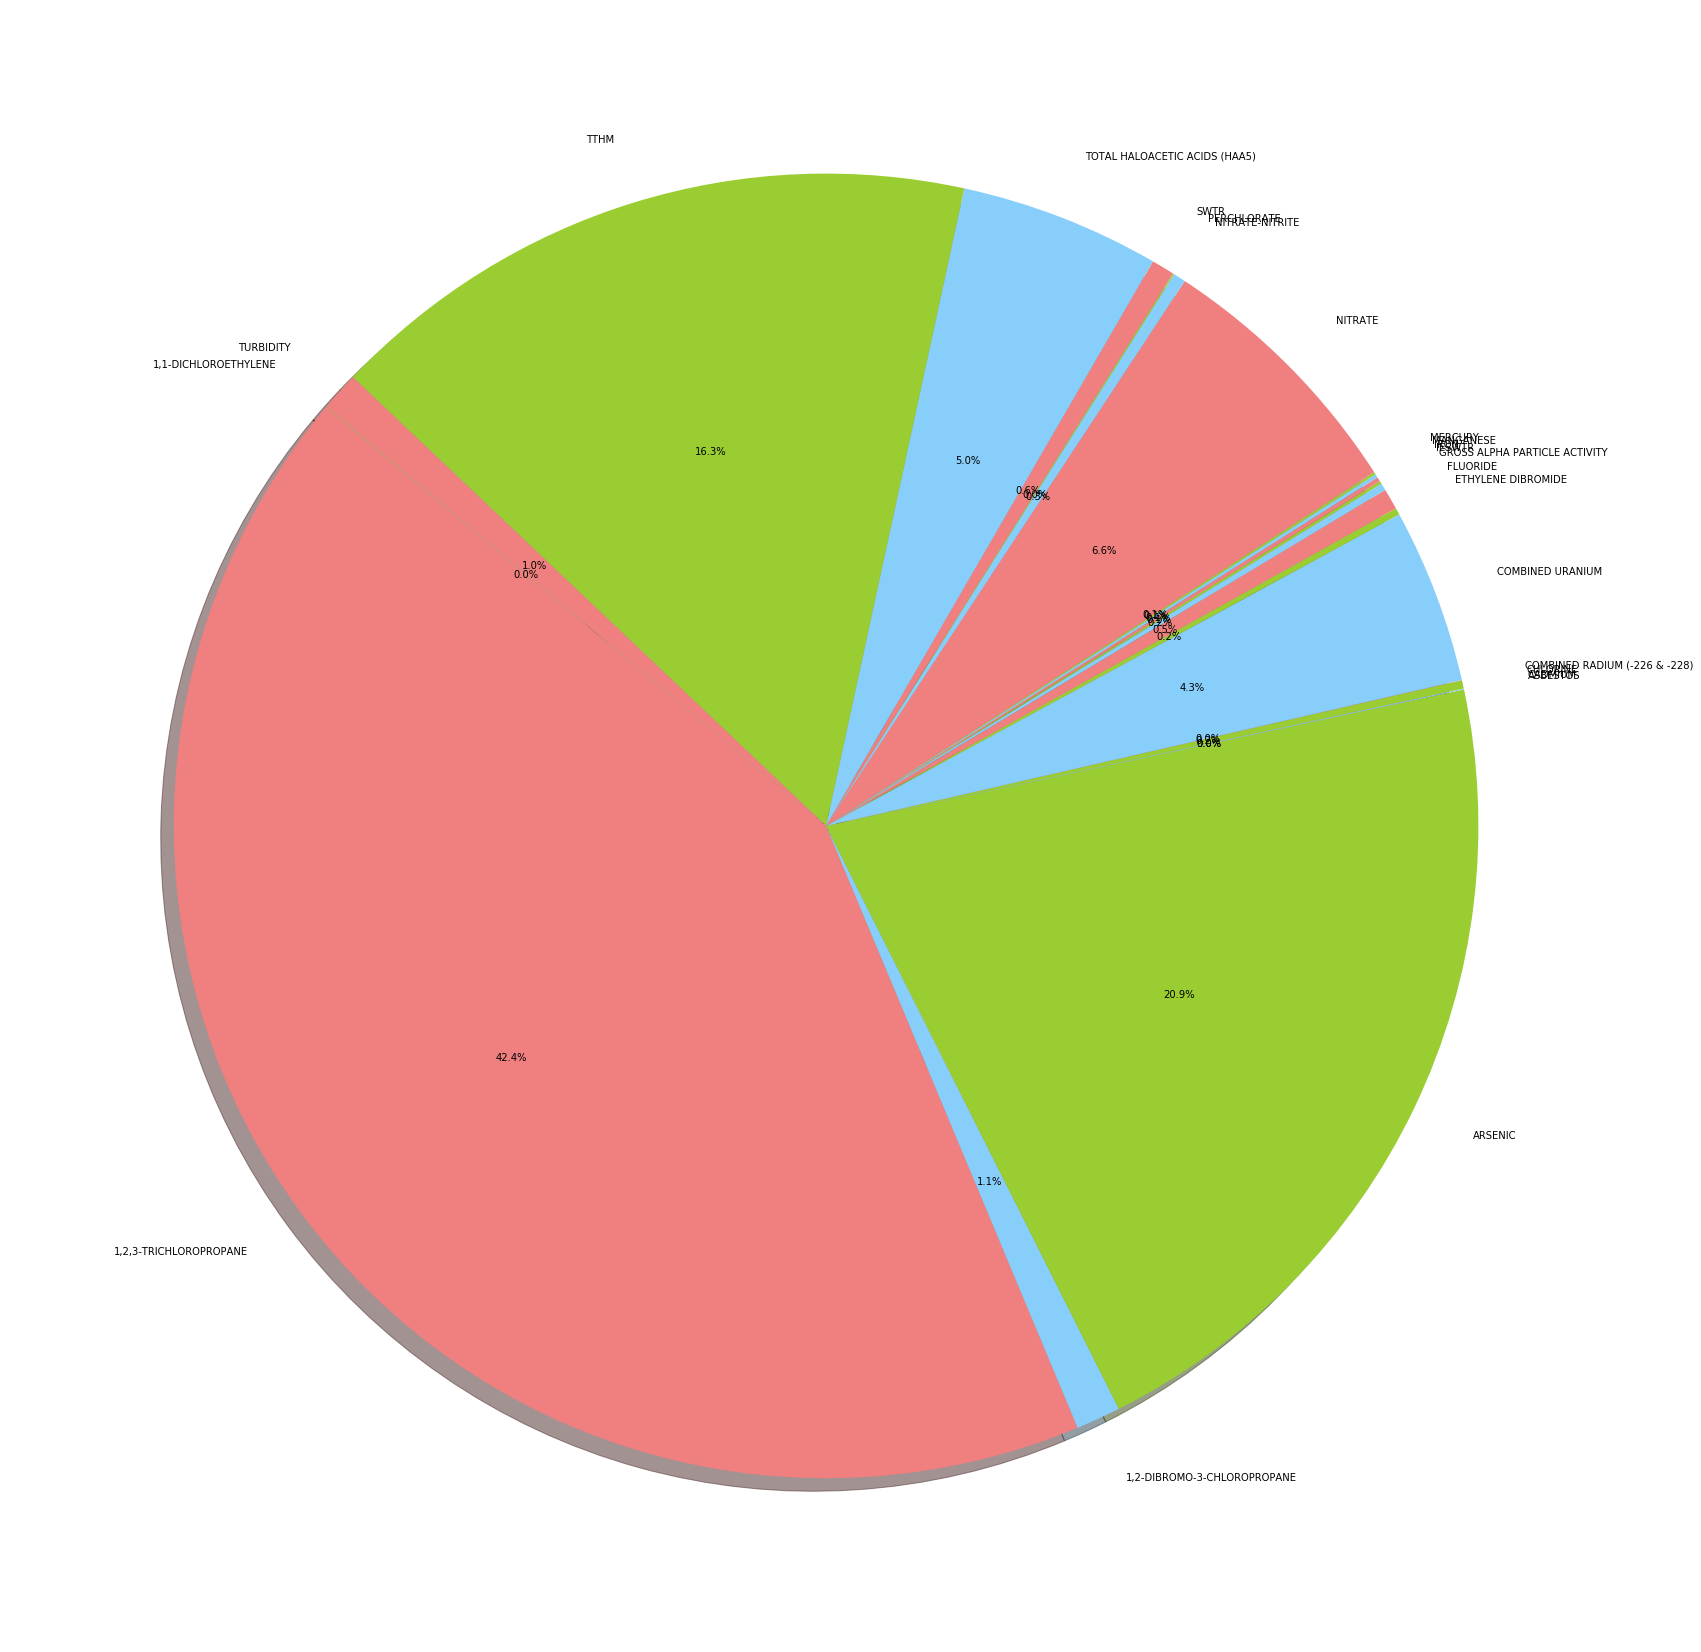

In [139]:
size_pop = population['SumOfPOPULATION'].as_matrix(columns = None)
labels_pop = population['ANALYTE_NAME'].as_matrix(columns = None)
plt.figure(figsize=(40,30))
plt.pie(size_pop, labels=labels_pop, colors=colors, autopct = '%1.1f%%', shadow=True, startangle=140)